In [47]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import importlib

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from time import time

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap
importlib.reload(sys.modules["utilities.corporate_design_colors_v4"])

from theory.models import get_I_nA
from theory.models import get_I_nA_dynes
from theory.models import get_I_nA_HA
from theory.models import get_I_nA_FCS
from theory.models import get_I_nA_FCS_pbar
from theory.models import get_I_nA_PAT
from theory.models import get_I_nA_PAMAR
from theory.models import get_tien_gordon_pamar

from theory.models import G_0_muS

importlib.reload(sys.modules["theory.models"])

<module 'theory.models' from '/Users/oliver/Documents/p5control-bluefors-evaluation/theory/models/__init__.py'>

In [74]:
# Parameter
V_mV: np.ndarray = np.linspace(-.8, .8, 801, dtype='float64') # mV
tau:float = 0.8
T_K:float = 0.1
Delta_meV = (189e-3, 189e-3)
Gamma_meV = (4e-3, 4e-3)
Gamma_min_meV:float = 1e-3

pincode = np.array([0.80, 0.62, 0.33, 0.25, 0.01])

A_mV: np.ndarray = np.linspace(0, 1.2, 301, dtype='float64')
nu_GHz: float = 19.3

print(f'Estimated time: t_FCS = {np.shape(np.where(V_mV>=0))[1]/3:.1f}s')

Estimated time: t_FCS = 133.7s


In [75]:
# get current Dynes
t_dynes = time()
I_nA_dynes = get_I_nA(
    V_mV = V_mV,
    tau=tau,
    T_K=T_K,
    Delta_meV=Delta_meV,
    Gamma_meV=Gamma_meV,
    model='dynes',
    Gamma_min_meV=Gamma_min_meV,
    )
G_dynes = np.gradient(I_nA_dynes, V_mV, axis=-1) / G_0_muS
t_dynes = time() - t_dynes

Dynes:   0%|          | 0/1 [00:00<?, ?it/s]

Dynes: 100%|██████████| 1/1 [00:00<00:00, 47.57it/s]


In [76]:
# get current HA
t_HA = time()
I_nA_HA = get_I_nA(
    V_mV = V_mV,
    tau=tau,
    T_K=T_K,
    Delta_meV=Delta_meV,
    Gamma_meV=Gamma_meV,
    model='ha'
    )
G_HA = np.gradient(I_nA_HA, V_mV, axis=-1) / G_0_muS
t_HA = time() - t_HA

HA: 100%|██████████| 1/1 [00:00<00:00, 325.72it/s]


ValueError: x and y must have same first dimension, but have shapes (801,) and (5, 801)

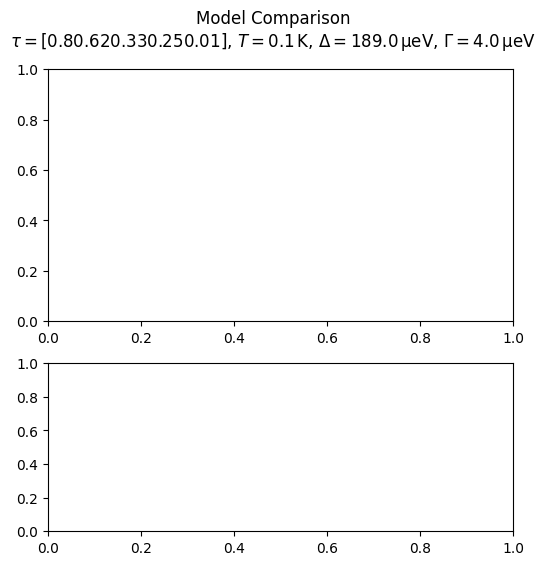

In [70]:
# show currents and conductance from Dynes & HA
%matplotlib inline
fig, [ax0, ax1] = plt.subplots(2,1, height_ratios=[3, 2], figsize=(6, 6))

title = 'Model Comparison\n'
title += f'$\\tau = {tau}$, $T={T_K}\\,$K, '
if Delta_meV[0] == Delta_meV[1]:
    title += f"$\\Delta = {Delta_meV[0]*1e3}\\,$µeV, "
else:
    title += f"$\\Delta = ({Delta_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV, "
if Gamma_meV[0] == Gamma_meV[1]:
    title += f"$\\Gamma = {Gamma_meV[0]*1e3}\\,$µeV"
else:
    title += f"$\\Gamma = ({Gamma_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV"

fig.suptitle(title)

zorder = 0 
ax0.plot(V_mV, I_nA_HA, 'grey', zorder=zorder, label=f'HA\n$t={t_HA:.2f}\\,$s')
ax1.plot(V_mV, G_HA, 'grey', zorder=zorder)
zorder =1 
ax0.plot(V_mV, I_nA_dynes, 'lightgrey', zorder=zorder, label=f'Dynes\n$t = {t_dynes:.2f}\\,$s')
ax1.plot(V_mV, G_dynes, 'lightgrey', zorder=zorder)

ax0.set_ylabel(r'$I$ (nA)')
ax1.set_ylabel(r'd$I/$d$V$ ($G_0$)')
ax1.set_xlabel("Voltage (mV)")

ax0.sharex(ax1)
ax0.legend(fontsize="small", frameon=False)

for ax in [ax0, ax1]:

    ax.grid()
    ax.tick_params(
        direction='in',       # Ticks nach innen
        top=True,             # obere Ticks ein
        bottom=True,          # untere Ticks ein
        left=True,            # linke Ticks ein
        right=True,           # rechte Ticks ein
        which='both'          # sowohl Major- als auch Minor-Ticks
    )

ax0.tick_params(labelbottom=False)
ax0.set_xlabel('')

In [39]:
# get current FCS
t_FCS = time()
I_nA_FCS = get_I_nA_FCS(
    V_mV = V_mV,
    tau=tau,
    T_K=T_K,
    Delta_meV=Delta_meV,
    Gamma_meV=Gamma_meV,
    )
G_FCS = np.gradient(I_nA_FCS, V_mV, axis=0) / G_0_muS
t_FCS = time() - t_FCS

In [40]:
# get current FCS pbar
t_FCS_pbar = time()
I_nA_FCS_pbar = get_I_nA_FCS_pbar(
    V_mV = V_mV,
    tau=tau,
    T_K=T_K,
    Delta_meV=Delta_meV,
    Gamma_meV=Gamma_meV,
    )
G_FCS_pbar = np.gradient(I_nA_FCS_pbar, V_mV, axis=0) / G_0_muS
t_FCS_pbar = time() - t_FCS_pbar

cached values: 0/401


IV simulations: 100%|██████████| 401/401 [01:59<00:00,  3.36sim/s]


Text(0.5, 0, '')

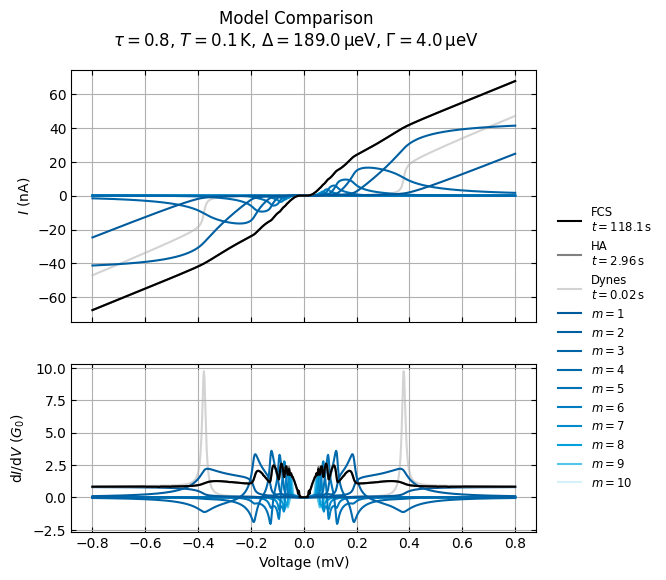

In [41]:
# show currents and conductance from Dynes, HA & Full Counting Statistics
%matplotlib inline
fig, [ax0, ax1] = plt.subplots(2,1, height_ratios=[3, 2], figsize=(6, 6))

title = 'Model Comparison\n'
title += f'$\\tau = {tau}$, $T={T_K}\\,$K, '
if Delta_meV[0] == Delta_meV[1]:
    title += f"$\\Delta = {Delta_meV[0]*1e3}\\,$µeV, "
else:
    title += f"$\\Delta = ({Delta_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV, "
if Gamma_meV[0] == Gamma_meV[1]:
    title += f"$\\Gamma = {Gamma_meV[0]*1e3}\\,$µeV"
else:
    title += f"$\\Gamma = ({Gamma_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV"

fig.suptitle(title)

zorder = 20
ax0.plot(V_mV, I_nA_FCS[:,0], 'k', zorder=zorder, label=f"FCS\n$t = {t_FCS:.1f}\\,$s")
ax1.plot(V_mV, G_FCS[:,0], 'k', zorder=zorder)
zorder -=1
ax0.plot(V_mV, I_nA_HA, 'grey', zorder=zorder, label=f'HA\n$t={t_HA:.2f}\\,$s')
ax1.plot(V_mV, G_HA, 'grey', zorder=zorder)
zorder =0
ax0.plot(V_mV, I_nA_dynes, 'lightgrey', zorder=zorder, label=f'Dynes\n$t = {t_dynes:.2f}\\,$s')
ax1.plot(V_mV, G_dynes, 'lightgrey', zorder=zorder)
zorder =16

for i in range(1, I_nA_FCS.shape[1]):
    ax0.plot(V_mV, I_nA_FCS[:,i], zorder=zorder, color=cmap()(.8/(11-i)+.1), label=f"$m = {i}$")
    ax1.plot(V_mV, G_FCS[:,i], zorder=zorder, color=cmap()(.8/(11-i)+.1))
    zorder -=1

ax0.set_ylabel(r'$I$ (nA)')
ax1.set_ylabel(r'd$I/$d$V$ ($G_0$)')
ax1.set_xlabel("Voltage (mV)")

ax0.sharex(ax1)

ax0.legend(fontsize="small", frameon=False,

    loc="upper left",       # Legende links-mittig am Ankerpunkt
    bbox_to_anchor=(1.025, 0.5),  # Ankerpunkt: rechts neben dem Plotbereich
)

for ax in [ax0, ax1]:

    ax.grid()
    ax.tick_params(
        direction='in',       # Ticks nach innen
        top=True,             # obere Ticks ein
        bottom=True,          # untere Ticks ein
        left=True,            # linke Ticks ein
        right=True,           # rechte Ticks ein
        which='both'          # sowohl Major- als auch Minor-Ticks
    )

ax0.tick_params(labelbottom=False)
ax0.set_xlabel('')

In [42]:
# get current PAT
t_PAT = time()
I_nA_PAT = get_I_nA_PAT(
    A_mV = A_mV,
    V_mV = V_mV,
    I_nA = I_nA_HA,
    nu_GHz = nu_GHz,
    )
G_PAT = np.gradient(I_nA_PAT, V_mV, axis=1) / G_0_muS
t_PAT = time() - t_PAT
print('time: ',t_PAT)

time:  0.14935088157653809


Text(0.5, 0, '$V_0$ (mV)')

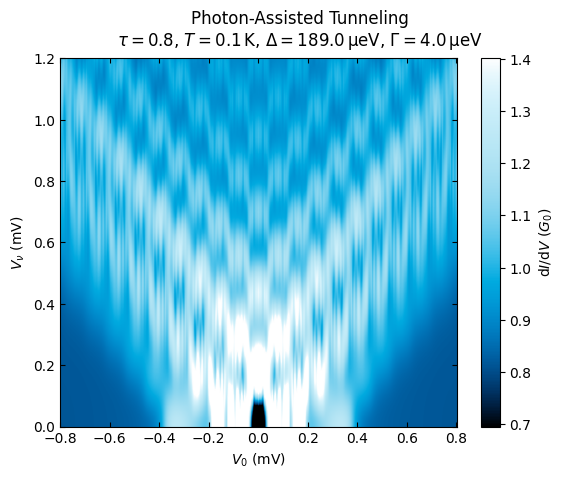

In [43]:
# show PAT
%matplotlib inline
z = G_PAT
x = V_mV
y = A_mV

title = "Photon-Assisted Tunneling\n"
title += f'$\\tau = {tau}$, $T={T_K}\\,$K, '
if Delta_meV[0] == Delta_meV[1]:
    title += f"$\\Delta = {Delta_meV[0]*1e3}\\,$µeV, "
else:
    title += f"$\\Delta = ({Delta_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV, "
if Gamma_meV[0] == Gamma_meV[1]:
    title += f"$\\Gamma = {Gamma_meV[0]*1e3}\\,$µeV"
else:
    title += f"$\\Gamma = ({Gamma_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV"

dx, dy = x[-1]-x[-2], y[-1]-y[-2]
ext = (x[0]-dx/2, x[-1]+dx/2, y[0]-dy/2, y[-1]+dy/2)
clim = (np.nanmean(z)-2*np.nanstd(z), np.nanmean(z)+2*np.nanstd(z))

fig, ax = plt.subplots()
im = ax.imshow(
    z, 
    aspect='auto', 
    origin='lower', 
    clim=clim, 
    extent=ext, 
    interpolation=None,
    cmap=cmap(bad="grey"),
    )
ax.tick_params(
        direction='in',       # Ticks nach innen
        top=True,             # obere Ticks ein
        bottom=True,          # untere Ticks ein
        left=True,            # linke Ticks ein
        right=True,           # rechte Ticks ein
        which='both'          # sowohl Major- als auch Minor-Ticks
    )
cbar = fig.colorbar(im, label='d$I/$d$V$ ($G_0$)')
fig.suptitle(title)
ax.set_ylabel(r'$V_\nu$ (mV)')
ax.set_xlabel(r'$V_0$ (mV)')

In [44]:
# get current PAMAR
t_PAMAR = time()
I_nA_PAMAR = get_I_nA_PAMAR(
    A_mV = A_mV,
    V_mV = V_mV,
    I_nA = I_nA_FCS,
    nu_GHz = nu_GHz,
    )
G_PAMAR = np.gradient(I_nA_PAMAR, V_mV, axis=1) / G_0_muS
t_PAMAR = time() - t_PAMAR
print('time: ',t_PAMAR)

time:  18.95913290977478


In [45]:
# get current PAMAR (old)
t_PAMAR = time()
I_nA_PAMAR = get_tien_gordon_pamar(
    voltage_nu_V=A_mV*1e-3,
    voltage_bias_V=V_mV*1e-3,
    current_0=I_nA_FCS*1e-9,
    energy_gap_eV=Delta_0_meV*1e-3,
    nu=nu_GHz*1e9,
    M=4,
    ) * 1e9
G_PAMAR = np.gradient(I_nA_PAMAR, V_mV, axis=1) / G_0_muS
t_PAMAR = time() - t_PAMAR
print('time: ',t_PAMAR)

PAMAR total:   0%|          | 0/6003 [00:00<?, ?it/s]

PAMAR total: 100%|██████████| 6003/6003 [00:03<00:00, 1677.96it/s]

time:  3.58290696144104


Text(0.5, 0, '$V_0$ (mV)')

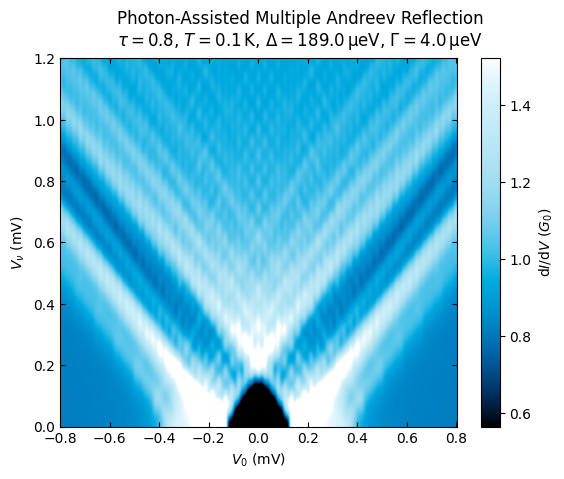

In [46]:
# show PAMAR
%matplotlib inline
z = G_PAMAR
x = V_mV
y = A_mV

title = "Photon-Assisted Multiple Andreev Reflection\n"
title += f'$\\tau = {tau}$, $T={T_K}\\,$K, '
if Delta_meV[0] == Delta_meV[1]:
    title += f"$\\Delta = {Delta_meV[0]*1e3}\\,$µeV, "
else:
    title += f"$\\Delta = ({Delta_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV, "
if Gamma_meV[0] == Gamma_meV[1]:
    title += f"$\\Gamma = {Gamma_meV[0]*1e3}\\,$µeV"
else:
    title += f"$\\Gamma = ({Gamma_meV[0]*1e3},{Delta_meV[1]*1e3})\\,$µeV"
    
dx, dy = x[-1]-x[-2], y[-1]-y[-2]
ext = (x[0]-dx/2, x[-1]+dx/2, y[0]-dy/2, y[-1]+dy/2)
clim = (np.nanmean(z)-2*np.nanstd(z), np.nanmean(z)+2*np.nanstd(z))

fig, ax = plt.subplots()
im = ax.imshow(
    z, 
    aspect='auto', 
    origin='lower', 
    clim=clim, 
    extent=ext, 
    interpolation=None,
    cmap=cmap(bad="grey"),
    )
ax.tick_params(
        direction='in',       # Ticks nach innen
        top=True,             # obere Ticks ein
        bottom=True,          # untere Ticks ein
        left=True,            # linke Ticks ein
        right=True,           # rechte Ticks ein
        which='both'          # sowohl Major- als auch Minor-Ticks
    )
cbar = fig.colorbar(im, label='d$I/$d$V$ ($G_0$)')
fig.suptitle(title)
ax.set_ylabel(r'$V_\nu$ (mV)')
ax.set_xlabel(r'$V_0$ (mV)')